# CA04 Ensemble Models

Team 5: Mathia Quimpo, Matthew Chin

## 1. Data Source and Contents

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the dataset
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

In [2]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [3]:
# check for missing values
missing_values =(df.isnull().sum())
missing_values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

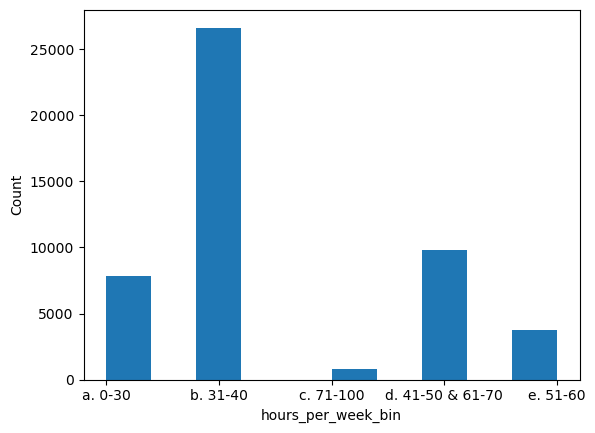

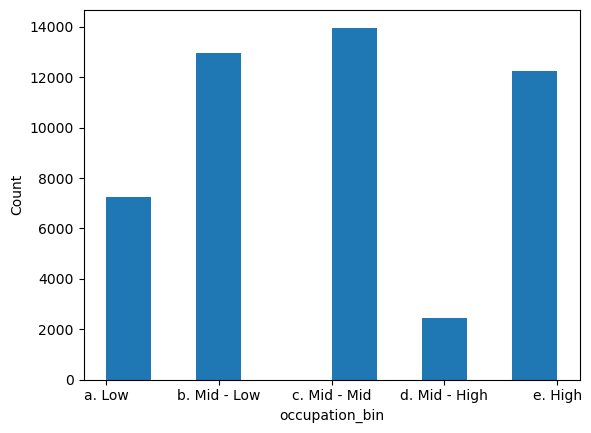

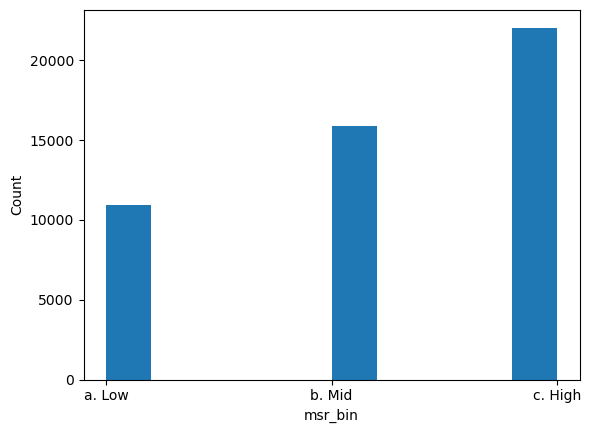

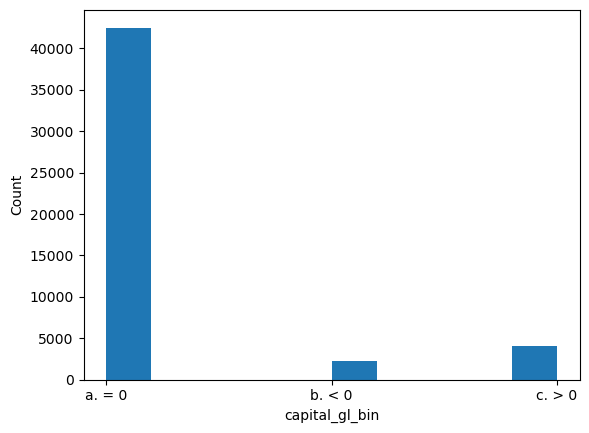

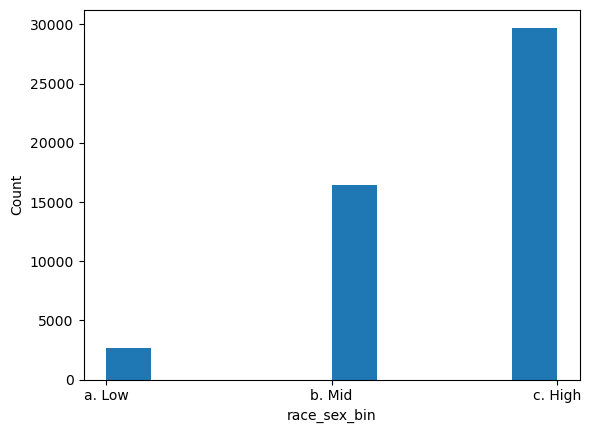

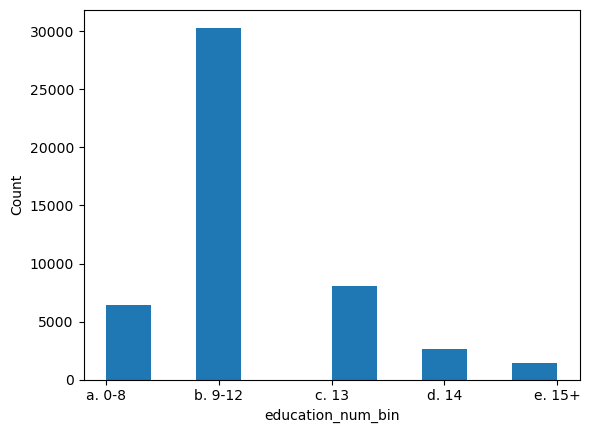

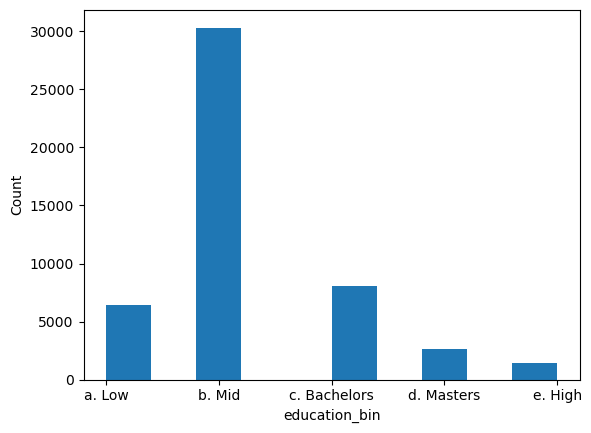

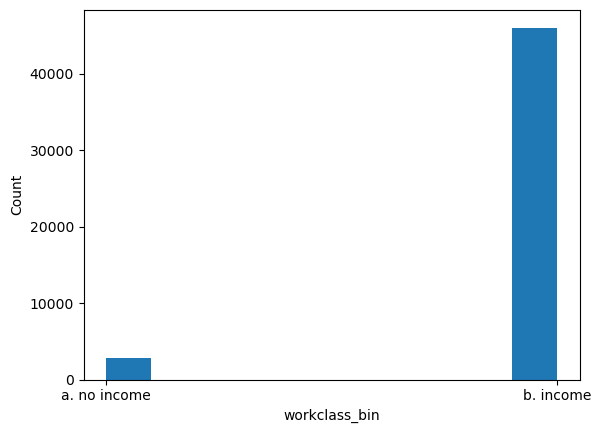

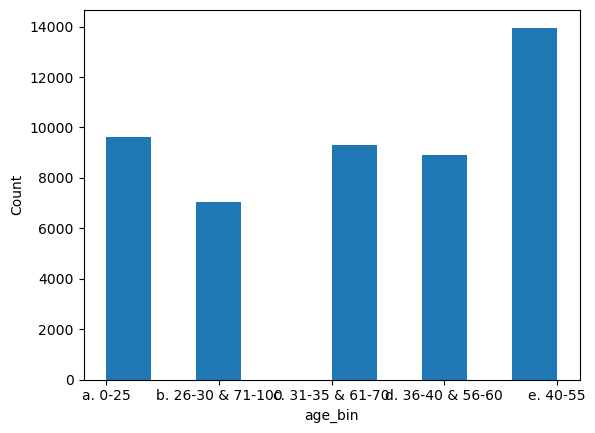

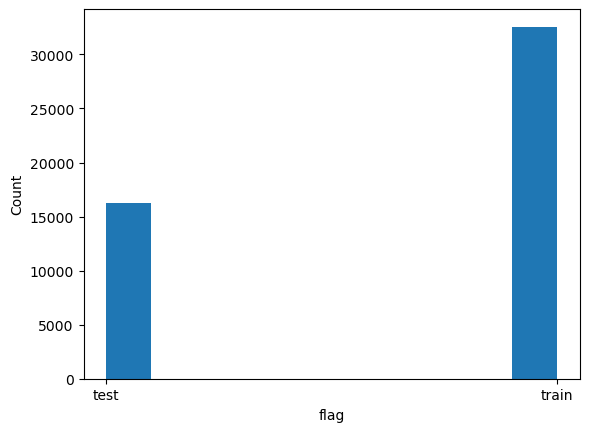

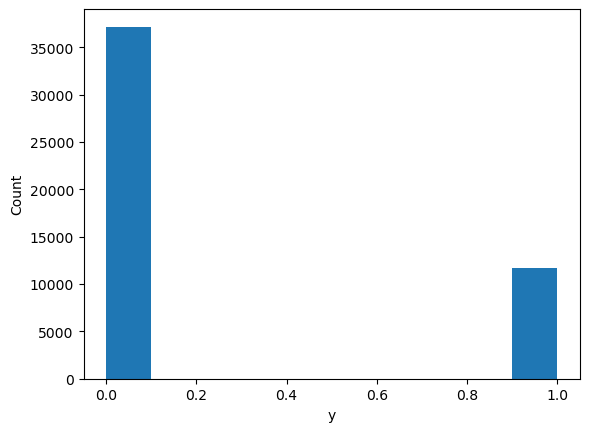

In [4]:
# use histogram to visualize outliers
for col in df:
    df.sort_values(by=col, inplace=True)
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [5]:
def data_quality_report(df):

  # missing values
  missing_values_percentage = missing_values / df.shape[0] * 100

  # duplicate records
  duplicate_records = df[df.duplicated()]

  # Create a data quality report dataframe
  report = pd.DataFrame({
    "Missing Values": missing_values,
    "Missing Values Percentage": missing_values_percentage,
    "Duplicate Records": duplicate_records.shape[0],
  })


# Create the data quality report
report = data_quality_report(df)

# Print the report
print(report)

None


### Training and Test Data

In [6]:
for column in ['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']:
    df[column] = df[column].astype('category')

In [7]:
# Splitting data into Training and Testing
train = df[df.flag == "train"].copy()
test = df[df.flag == "test"].copy()

# Drop flag column
train.drop(columns='flag', inplace=True)
test.drop(columns='flag', inplace=True)

In [8]:
# Perform one-hot encoding for categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Ensure the columns in the training and testing sets are aligned
train, test = train.align(test, join='outer', axis=1, fill_value=0)

In [9]:
train.head()

,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
11940,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
30750,0,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
14344,0,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
14451,0,True,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
21941,0,False,True,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [10]:
test.head()

,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
33997,0,False,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
43843,0,False,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
36696,0,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
46583,0,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
33339,0,False,True,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False


In [25]:
# Train variables
y_train = train['y'] #dependent variable
x_train = train.drop('y', axis=1) #independent variables
y_test = test['y']
x_test = test.drop('y', axis=1)

## 2. Finding Optimal Value of a key Ensemble Method Hyper-parameter

<Axes: >

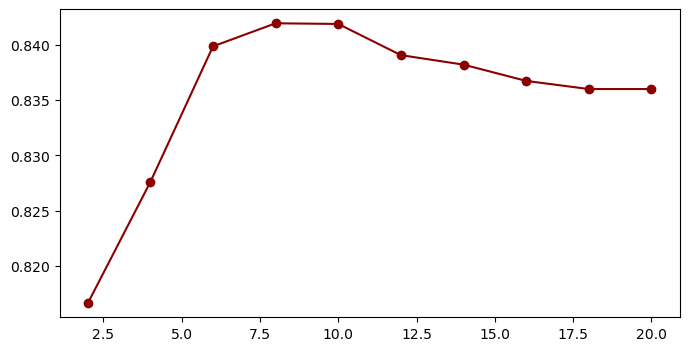

In [12]:
# Find the optimal value of max depth 
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for trees in max_depth_options: 
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o')

In [13]:
def plot_accuracy_vs_estimators(model, x_train, y_train, x_test, y_test, estimator_values):
    accuracy_results = []
    n_estimator_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    for n_estimators in n_estimator_values:
        model_instance = model(n_estimators=n_estimators, random_state=101)
        model_instance.fit(x_train, y_train)
        y_pred = model_instance.predict(x_test)
        accuracy = np.mean(y_test == y_pred)
        accuracy_results.append(accuracy)

    plt.figure(figsize=(10, 6))
    pd.Series(accuracy_results, estimator_values).plot(color='red', marker='o')
    plt.title(f'{model.__name__}: Accuracy vs. n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')

In [14]:
def plot_auc_vs_estimators(model, x_train, y_train, x_test, y_test, estimator_values):
    auc_results = []
    n_estimator_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    for n_estimators in n_estimator_values:
        model_instance = model(n_estimators=n_estimators, random_state=101)
        model_instance.fit(x_train, y_train)
        y_pred_proba = model_instance.predict_proba(x_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_pred_proba)
        auc_results.append(auc_score)

    plt.figure(figsize=(10, 6))
    pd.Series(auc_results, estimator_values).plot(color='blue', marker='o')
    plt.title(f'{model.__name__}: AUC vs. n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')

## 3. Building a Random Forest Model

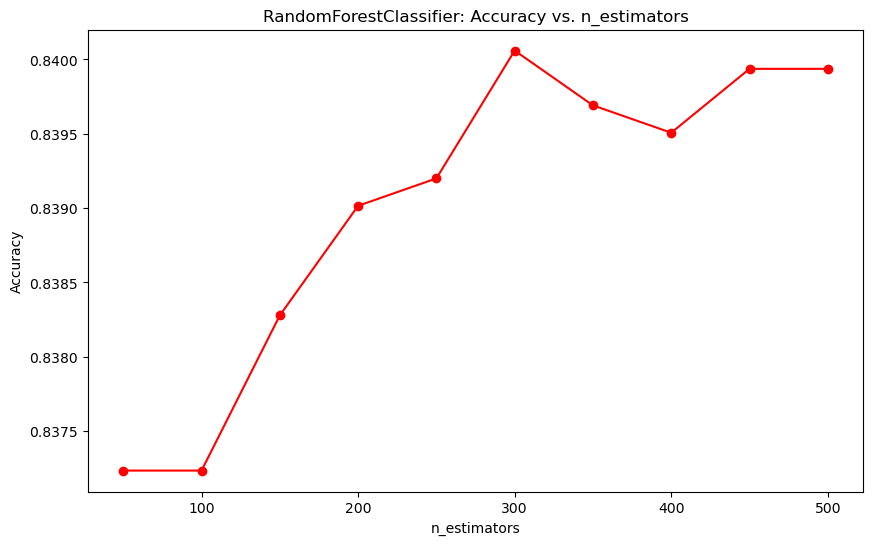

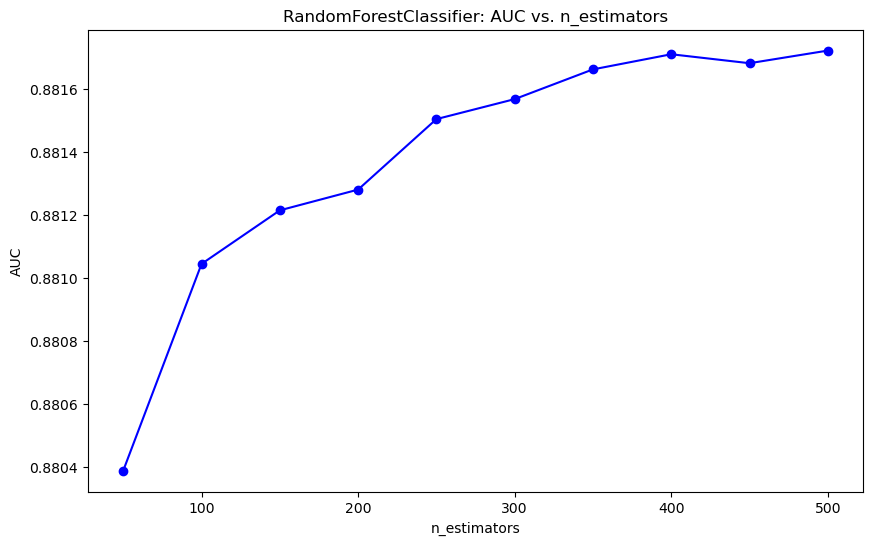

In [26]:
n_estimator_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Plotting the model
plot_accuracy_vs_estimators(RandomForestClassifier, x_train, y_train, x_test, y_test, n_estimator_values)
plot_auc_vs_estimators(RandomForestClassifier, x_train, y_train, x_test, y_test, n_estimator_values)

### 3.1. Write your observations about the Classifier's behavior with respect to the number of estimators.
The accuracy of the Random Forest model increased steadily, peaking at 300 estimators, decreasing between 300 and 400 estimators, and increasing again. The AUC of the model increased relatively steadily, peaking at 500 estimators.

### 3.2 Is there an optimal value of the estimator within the given range?
For accuracy, the optimal value would be 300 estimators. For AUC, the optimal value would be 500 estimators. To optimize both accuracy and AUC, the optimal value would be 500 estimators.


## 4. Building an AdaBoost Model

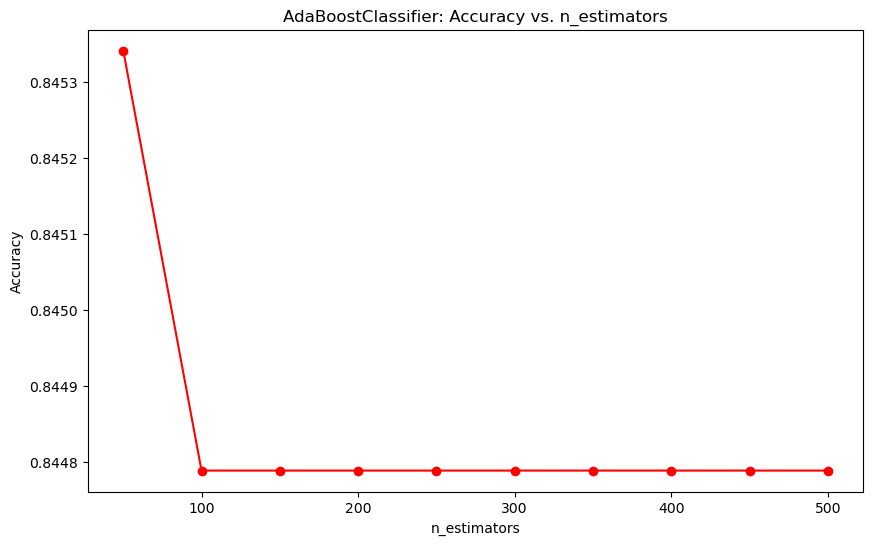

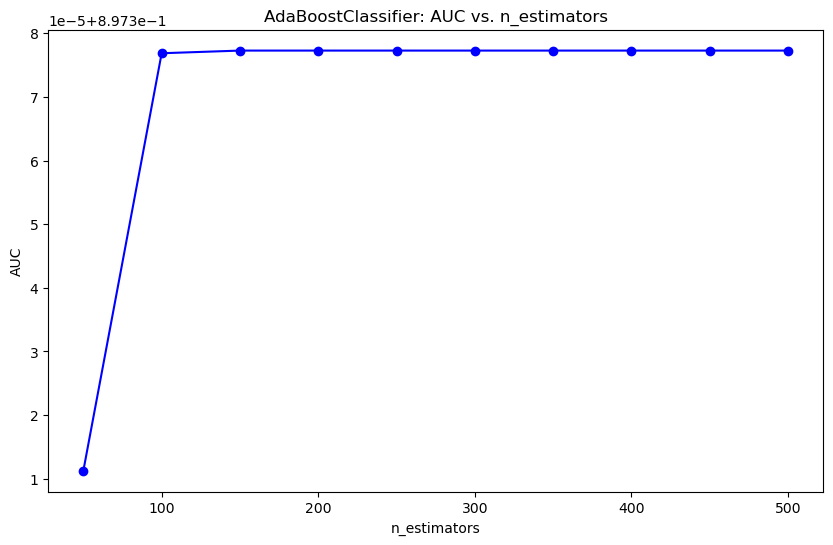

In [17]:
# Plotting the model
plot_accuracy_vs_estimators(AdaBoostClassifier, x_train, y_train, x_test, y_test, n_estimator_values)
plot_auc_vs_estimators(AdaBoostClassifier, x_train, y_train, x_test, y_test, n_estimator_values)

### 4.1. Write your observations about the Classifier's behavior with respect to the number of estimators.
For the AdaBoost Model, both the accuracy and AUC for this model remain relatively constant as the number of estimators increases.

### 4.2 Is there an optimal value of the estimator within the given range?
There is not exactly a clear optimal value of the estimator within the given range, as accuracy and AUC are relatively constant with varying numbers of estimators.


## 5. Building a Gradient Boost Model

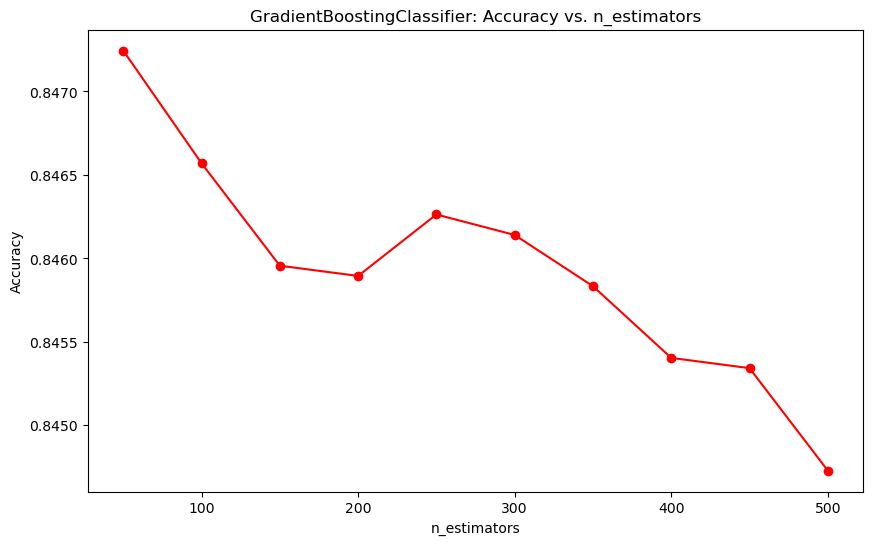

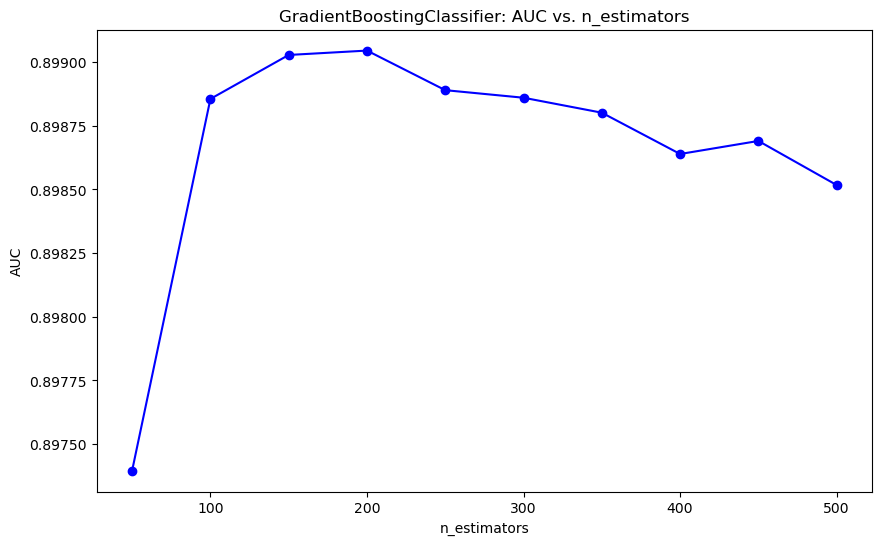

In [18]:
# Plotting the model
plot_accuracy_vs_estimators(GradientBoostingClassifier, x_train, y_train, x_test, y_test, n_estimator_values)
plot_auc_vs_estimators(GradientBoostingClassifier, x_train, y_train, x_test, y_test, n_estimator_values)

### 5.1. Write your observations about the Classifier's behavior with respect to the number of estimators.
The accuracy of the Gradient Boost Model was highest at 100 estimators, steadily decreased before increasing again at 250 estimators, then steadily decreased again. The AUC steadily increased, peaking at 200 estimators, then steadily decreased.

### 5.2 Is there an optimal value of the estimator within the given range?
For accuracy, the optimal value would be 100 estimators. For AUC, the optimal value would be 200 estimators. If prioritizing accuracy, the optimal values would be 100 or 250. If prioritizing AUC, the optimal value would be 150 or 200 estimators.


## 6. Building an XGBoost Model

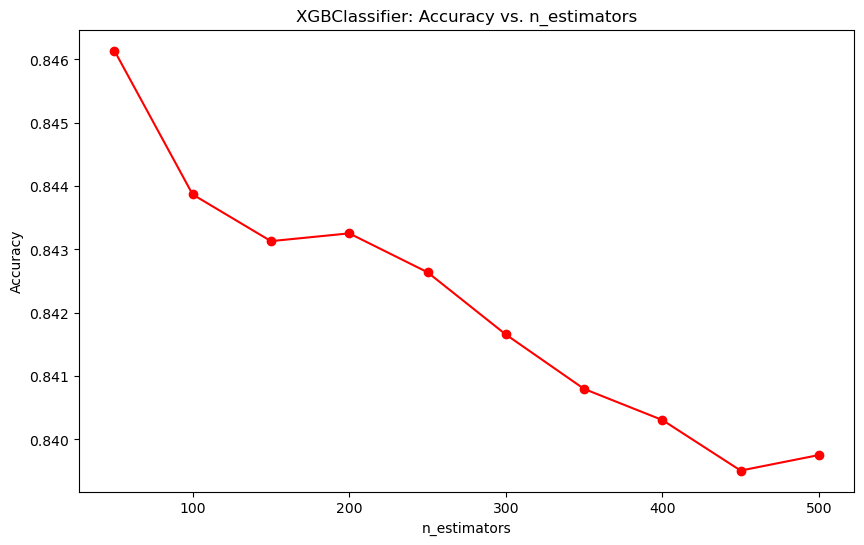

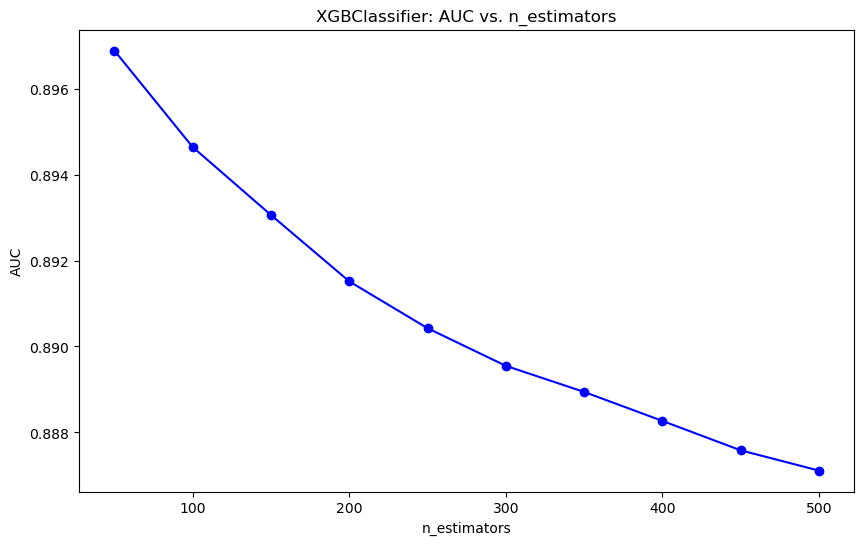

In [19]:
# Ensure column names are strings without problematic characters
x_train.columns = x_train.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')
x_test.columns = x_test.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')

# Plotting the model
plot_accuracy_vs_estimators(XGBClassifier, x_train, y_train, x_test, y_test, n_estimator_values)
plot_auc_vs_estimators(XGBClassifier, x_train, y_train, x_test, y_test, n_estimator_values)

### 6.1. Write your observations about the Classifier's behavior with respect to the number of estimators.
For the XGBoost Model, both the accuracy and AUC decrease fairly steadily as the number of estimators increases.

### 6.2 Is there an optimal value of the estimator within the given range?
The optimal value of the estimator within the given range would be 100 estimators.


## 7. Compare Performance

In [24]:
model_names = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGBoost']
accuracy_scores = []
auc_scores = []

# Calculate accuracy and AUC for each model
for model in [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier()]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

# Create a DataFrame to display the results
performance_df = pd.DataFrame({'Accuracy': accuracy_scores, 'AUC': auc_scores}, index=model_names)
performance_df = performance_df.T
performance_df

,Random Forest,AdaBoost,Gradient Boost,XGBoost
Accuracy,0.838953,0.845341,0.846570,0.843867
AUC,0.748384,0.748884,0.754896,0.757707


Gradient Boost model performed the best in terms of accuracy while XGB peformed the best for AUC.